In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Get the data

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [3]:
#완성된 함수
from PIL import Image
import math
import time
def img_to_mnist(start,n_img,img_type,is_scan=True):
    global X_mnist
    for n in range(start-1,n_img):
        t=0.0 
        st=time.time()
        #imige upload
        if img_type == "png":
            im=Image.open('./mnist/MNIST-{}.png'.format(n+1)).convert('RGB')#이미지 업로드 ./mnist에서 'MNIST-n.png' 파일 업로드
        elif img_type == "jpg":
            im=Image.open('./mnist/MNIST-{}.jpg'.format(n+1)).convert('RGB')#이미지 업로드 ./mnist에서 'MNIST-n.jpg' 파일 업로드
        #흑백처리
        for i in range (0,im.size[1]):
                for j in range(0,im.size[0]):
                    r=im.getpixel((j,i))
                    r_avg=math.ceil((r[0]+r[1]+r[2])/3)
                    im.putpixel((j,i),(r_avg,r_avg,r_avg))

             
        white_img=im
        #표 테두리 좌표 구하기
        max_x=0
        min_x=10000
        max_y=0
        min_y=10000
        for i in range (2,im.size[1]-2):
            for j in range(2,im.size[0]-2):
                if im.getpixel((j,i))[0]<=230:#노이즈를 대비해 230이하로 검은색검출
                    max_x=max(max_x,j)
                    max_y=max(max_y,i)
                    min_x=min(min_x,j)
                    min_y=min(min_y,i)
        print("min_x :",min_x,"min_y :",min_y,"max_x :",max_x,"max_y :",max_y)
        cropped_img=white_img.crop((min_x,min_y,max_x+1,max_y+1))#표부분만 자르기
        
        
        shift_x=0
        shift_y=0
        
        #shift_x 탐색
        if is_scan==True:
            shift_x_row=0
            for i in range (min_y,max_y+1):
                for j in range(0,im.size[0]):
                    if im.getpixel((j,i))[0]<=230:
                        shift_x_row=j-min_x
#                         print("shift_x_row :",shift_x_row,"pixel :",im.getpixel((j,i))[0])
                        if shift_x_row>5:
                            shift_x_row=0
                        break
                shift_x=max(shift_x,shift_x_row)
                        
             #shift_y 탐색
            shift_y_row=0
            for j in range(min_x,max_x+1):   
                for i in range (0,im.size[1]):
                     if im.getpixel((j,i))[0]<=230:
                            shift_y_row=i-min_y
                            if shift_y_row>5:
                                shift_y_row=0
                            break
                shift_y=max(shift_y,shift_y_row)
            print("shift_x :",shift_x,"shift_y :",shift_y)              
                            
        pre_img=cropped_img.resize((280+int(shift_x*280/380),280+int(shift_y*280/380)))#280*280 픽셀로 변경,테두리 외곡된 만큼 더 크게 만듬
        print("size =",pre_img.size)
        for i in range (0,10):
            #테두리 위치 찾기
            bound_x=0
            bound_y=0
            if is_scan==True:
                bound_x_row=100
                for y in range(0,int(shift_y*280/380)+1):
                    for x in range(0,int(shift_x*280/380)+1):
                        if pre_img.getpixel((x,i*28+bound_y))[0]<=240:
                            bound_x_row=min(x,bound_x_row)
#                             print("bound_x_row :",bound_x_row)
                            break
                    if bound_x_row<100:
                        bound_x=max(bound_x_row,bound_x)

                        
                            
            for j in range (0,10):
                row=np.array([])
                bound_y=0
                #테두리 위치 찾기
                if is_scan==True:
                    bound_y_row=100
                    for y in range(0,int(shift_y*280/380)+1):
#                             if i==0 and j==0:
#                                 print(pre_img.getpixel((x,y))[0])
                            if pre_img.getpixel((j*28+bound_x,y))[0]<=230:
                                bound_y_row=min(y,bound_y_row)
                                break
                    if bound_y_row<100:
                        bound_y=max(bound_y_row,bound_y)
            
#                       print(j,i,":",bound_x,bound_y,pre_img.getpixel((j*28+bound_x,i*28+bound_y)))               
                plusx=0
                plusy=0
                if bound_x>0:
                    plusx=1
                if bound_y>0:
                    plusy=1
                
              
                mnist_img=pre_img.crop((j*28+bound_x+plusx,i*28+bound_y+plusy,(j+1)*28+bound_x+plusx,(i+1)*28+bound_y+plusy))
               
            
                for y in range(0,28):
                    for x in range(0,28):
#                         if x<=0 or x>=27 or y<=0 or y>=27:
                        if x<=1 or x>=26 or y<=1 or y>=26:
                            row= np.append(row,0) #mnist: 흰색=0, pilow: 흰색=255, 테투리 흰색 변경
                        else:
                            row= np.append(row,255-mnist_img.getpixel((x,y))[0]) #mnist: 흰색=0, pilow: 흰색=255
                
                X_mnist=np.append(X_mnist,[row],axis= 0)
              
        t+=time.time()-st      
        print(n+1,".",img_type,"time = ",t)
        print("===============================")

In [4]:
X_mnist=mnist["data"].to_numpy()
img_to_mnist(13,48,"jpg",True) #손글씨 가장 먼저 업로드 #36개 70000~73600
img_to_mnist(1,12,"jpg",False) #12개 73600~74800
img_to_mnist(49,91,"jpg",False)#43개 74800~79100
img_to_mnist(1,22,"png",False)#22개 79100~81300

min_x : 10 min_y : 12 max_x : 356 max_y : 357
shift_x : 1 shift_y : 1
size = (280, 280)
13 . jpg time =  21.021623849868774
min_x : 10 min_y : 13 max_x : 357 max_y : 357
shift_x : 2 shift_y : 0
size = (281, 280)
14 . jpg time =  20.99381184577942
min_x : 11 min_y : 12 max_x : 356 max_y : 358
shift_x : 0 shift_y : 1
size = (280, 280)
15 . jpg time =  20.229114294052124
min_x : 2 min_y : 13 max_x : 356 max_y : 376
shift_x : 5 shift_y : 0
size = (283, 280)
16 . jpg time =  20.622227668762207
min_x : 10 min_y : 13 max_x : 355 max_y : 357
shift_x : 1 shift_y : 0
size = (280, 280)
17 . jpg time =  20.344507932662964
min_x : 10 min_y : 12 max_x : 356 max_y : 357
shift_x : 1 shift_y : 1
size = (280, 280)
18 . jpg time =  20.509912252426147
min_x : 11 min_y : 12 max_x : 356 max_y : 357
shift_x : 1 shift_y : 2
size = (280, 281)
19 . jpg time =  20.75353455543518
min_x : 31 min_y : 11 max_x : 359 max_y : 337
shift_x : 1 shift_y : 1
size = (280, 280)
20 . jpg time =  21.331945657730103
min_x : 31 

min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
57 . jpg time =  24.401864051818848
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
58 . jpg time =  26.436481475830078
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
59 . jpg time =  27.26213836669922
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
60 . jpg time =  23.036458492279053
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
61 . jpg time =  24.06280541419983
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
62 . jpg time =  24.759117364883423
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
63 . jpg time =  22.976030111312866
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
64 . jpg time =  23.405604362487793
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
65 . jpg time =  21.66071653366089
min_x : 19 min_y : 20 max_x : 360 max_y : 359
size = (280, 280)
66 . jpg time =  22.48885226249695
min_

In [5]:
len(X_mnist)

81300

In [6]:
num=0
y_mnist=mnist["target"].to_numpy()
for i in range (70000,len(X_mnist)):
    y_mnist=np.append(y_mnist,num%10)
    num=(num+1)%10
    #print(i,y_mnist[i])
print(len(y_mnist))
print(y_mnist[70000:])

81300
[0 1 2 ... 7 8 9]


# Discover and visualize the data

Saving figure some_digit_plot


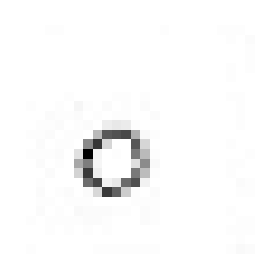

In [7]:
%matplotlib inline
#그림을 그리기 위해 import
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_mnist[71000]
#some_digit_image: 5그림
some_digit_image = some_digit.reshape(28, 28)#28x28배열로 바꿔줌(numpy.reshape(행, 열))
plt.imshow(some_digit_image, cmap=mpl.cm.binary)#imshow-이미지로 출력
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [8]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


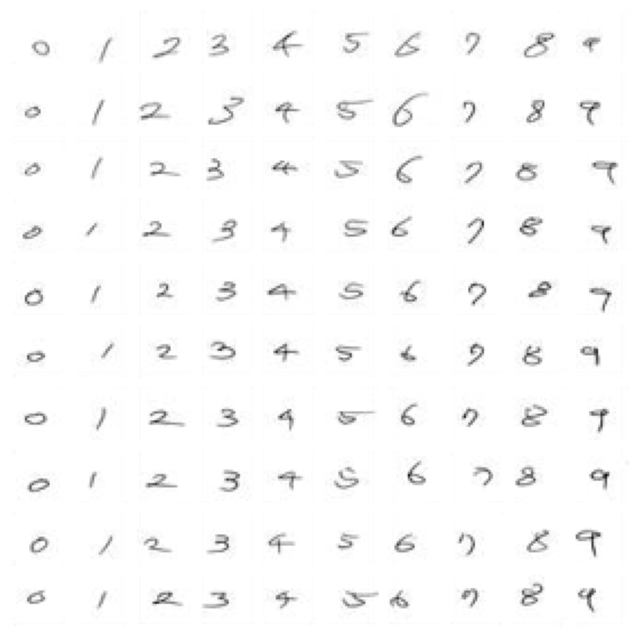

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
example_images = X_mnist[76900:77000]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [10]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

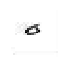

In [11]:
plt.figure(figsize=(1,1))
plot_digit(X_mnist[76990])

In [10]:
X_test1, y_test1 = X_mnist[73600:74410], y_mnist[73600:74410] #패드손글씨
X_test2, y_test2 = X_mnist[:7290], y_mnist[:7290] #기존mnist

X_test = np.concatenate((X_test1, X_test2), axis=0)
y_test = np.concatenate((y_test1, y_test2), axis=0)

X_val1, y_val1 = X_mnist[74410:75220], y_mnist[74410:75220] #패드손글씨
X_val2, y_val2 = X_mnist[7290:14580], y_mnist[7290:14580] #기존mnist

X_val = np.concatenate((X_val1, X_val2), axis=0)
y_val = np.concatenate((y_val1, y_val2), axis=0)

X_train1, y_train1 = X_mnist[14580:73600], y_mnist[14580:73600]
X_train2, y_train2 = X_mnist[75220:81300], y_mnist[75220:81300]

X_train = np.concatenate((X_train1, X_train2), axis=0)
y_train = np.concatenate((y_train1, y_train2), axis=0)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
X_val_scaled = scaler.fit_transform(X_val.astype(np.float64))

# Select and train a model

In [12]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

각 classifier의 스코어와 훈련시간을 내봄

In [15]:
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
lisvm_clf = LinearSVC(random_state=42)
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
mlp_clf = MLPClassifier(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier(leaf_size = 10)
svm_clf = SVC(gamma="scale",probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=0.9, bootstrap=True, oob_score = True, random_state=42)

In [16]:
import time

st = time.time()
extra_trees_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for extratree fitting")

40.90598750114441 seconds for extratree fitting


In [17]:
st = time.time()
lisvm_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for livsm fitting")

666.1286246776581 seconds for livsm fitting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [18]:
st = time.time()
log_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for log fitting")

9.586742401123047 seconds for log fitting


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
st = time.time()
mlp_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for mlp fitting")

266.3584234714508 seconds for mlp fitting


In [20]:
st = time.time()
rnd_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for rnd fitting")

40.75817370414734 seconds for rnd fitting


In [21]:
st = time.time()
knn_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for knn fitting")

0.05385851860046387 seconds for knn fitting


In [22]:
st = time.time()
svm_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for svm fitting")

4418.882298946381 seconds for svm fitting


In [23]:
st = time.time()
dt_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for DicisionTree fitting")

1.4599006175994873 seconds for DicisionTree fitting


In [24]:
st = time.time()
bag_clf.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for Bagging fitting")

5122.202353954315 seconds for Bagging fitting


scoring

In [25]:
st = time.time()
print(extra_trees_clf.score(X_val_scaled, y_val), ", ExtraTree")
ed = time. time()
print(ed - st, "seconds for ExtraTree score")

0.9417283950617283 , ExtraTree
0.7625138759613037 seconds for ExtraTree score


In [26]:
st = time.time()
print(lisvm_clf.score(X_val_scaled, y_val),", livsm")
ed = time. time()
print(ed - st, "seconds for lisvm score")

0.8311111111111111 , livsm
0.013962507247924805 seconds for lisvm score


In [27]:
st = time.time()
print(log_clf.score(X_val_scaled, y_val), ", Logistic")
ed = time. time()
print(ed - st, "seconds for Logistic score")

0.84 , Logistic
0.013962507247924805 seconds for Logistic score


In [28]:
st = time.time()
print(mlp_clf.score(X_val_scaled, y_val), ", mlp")
ed = time. time()
print(ed - st, "seconds for mlp score")

0.9234567901234568 , mlp
0.03690147399902344 seconds for mlp score


In [29]:
st = time.time()
print(rnd_clf.score(X_val_scaled, y_val), ", RandomForest")
ed = time. time()
print(ed - st, "seconds for RandomForest score")

0.9330864197530864 , RandomForest
0.5016920566558838 seconds for RandomForest score


In [30]:
st = time.time()
print(knn_clf.score(X_val_scaled, y_val), ", KNN")
ed = time. time()
print(ed - st, "seconds for KNN score")

0.891358024691358 , KNN
11.173255443572998 seconds for KNN score


In [31]:
st = time.time()
print(svm_clf.score(X_val_scaled, y_val), ", svm")
ed = time. time()
print(ed - st, "seconds for svm score")

0.9125925925925926 , svm
106.227121591568 seconds for svm score


In [32]:
st = time.time()
print(dt_clf.score(X_val_scaled, y_val), ", DicisionTree")
ed = time. time()
print(ed - st, "seconds for DicisionTree score")

0.31839506172839505 , DicisionTree
0.017952919006347656 seconds for DicisionTree score


In [33]:
st = time.time()
print(bag_clf.score(X_val_scaled, y_val), ", Bagging")
ed = time. time()
print(ed - st, "seconds for Bagging score")

0.8996296296296297 , Bagging
15.555219888687134 seconds for Bagging score


DicisionTree, Bagging, knn, SVC, 시간과 스코어가 좋지 않아서 제외하고 voting을 해봄

In [34]:
voting_clf1 = VotingClassifier(estimators=[('mlp', mlp_clf),
                                ('rnd', rnd_clf),('bag', bag_clf),('svm', svm_clf)], voting='hard')

In [35]:
st = time.time()
voting_clf1.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for Voting hard fitting")

9532.774625062943 seconds for Voting hard fitting


In [36]:
st = time.time()
print(voting_clf1.score(X_val_scaled, y_val), ", Voting hard")
ed = time. time()
print(ed - st, "seconds for voting hard score")

0.9371604938271605 , Voting hard
122.82826495170593 seconds for voting hard score


In [37]:
voting_clf2 = VotingClassifier(estimators=[('mlp', mlp_clf),
                                ('rnd', rnd_clf),('bag', bag_clf),('svm', svm_clf)], voting='soft')

In [38]:
st = time.time()
voting_clf2.fit(X_train_scaled, y_train)
ed = time.time()
print(ed - st, "seconds for Voting soft fitting")

9509.822798490524 seconds for Voting soft fitting


In [39]:
st = time.time()
print(voting_clf2.score(X_val_scaled, y_val), ", Voting soft")
ed = time. time()
print(ed - st, "seconds for voting soft score")

0.9387654320987654 , Voting soft
124.18127179145813 seconds for voting soft score


voting결과가 향상이 이루어지지 않아서 시간이 더 짧은 ExtraTree로 선택함

# Fine-tune the model

In [13]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score

minleaves = [1, 2, 3, 4, 5, 6]
maxleaves = [None, 20000, 18000, 16000, 14000]

best_score = 0.00

best_model = None

for minleaf in minleaves:
    for maxleaf in maxleaves:
        extra_trees_clf = ExtraTreesClassifier(min_samples_leaf = minleaf,
                                 max_leaf_nodes = maxleaf,warm_start = True, random_state=42)
        start=time.time()
        extra_trees_clf.fit(X_train_scaled, y_train)
        end=time.time()

        y_pred = extra_trees_clf.predict(X_val_scaled)
        score = accuracy_score(y_val, y_pred)
        print("time:",end-start,"Score:",score,
              "\n",extra_trees_clf)
            
        if best_score<score:
            best_score = score
            best_model = clone(extra_trees_clf)

time: 59.67785406112671 Score: 0.9417283950617283 
 ExtraTreesClassifier(random_state=42, warm_start=True)
time: 61.150940895080566 Score: 0.941358024691358 
 ExtraTreesClassifier(max_leaf_nodes=20000, random_state=42, warm_start=True)
time: 61.412755250930786 Score: 0.941358024691358 
 ExtraTreesClassifier(max_leaf_nodes=18000, random_state=42, warm_start=True)
time: 70.59319424629211 Score: 0.941358024691358 
 ExtraTreesClassifier(max_leaf_nodes=16000, random_state=42, warm_start=True)
time: 66.50427889823914 Score: 0.9398765432098766 
 ExtraTreesClassifier(max_leaf_nodes=14000, random_state=42, warm_start=True)
time: 50.574790239334106 Score: 0.9353086419753086 
 ExtraTreesClassifier(min_samples_leaf=2, random_state=42, warm_start=True)
time: 57.196614265441895 Score: 0.938395061728395 
 ExtraTreesClassifier(max_leaf_nodes=20000, min_samples_leaf=2, random_state=42,
                     warm_start=True)
time: 56.032721281051636 Score: 0.938395061728395 
 ExtraTreesClassifier(max_lea

In [93]:
best_score, best_model

(0.9417283950617283, ExtraTreesClassifier(random_state=42, warm_start=True))

In [94]:
n_epochs = 500
train_accuracy,val_accuracy = [], []
best_model.n_estimators = 1
for epoch in range(n_epochs):
    best_model.fit(X_train_scaled, y_train)
    y_train_predict = best_model.predict(X_train_scaled)
    y_val_predict = best_model.predict(X_val_scaled)
    train_accuracy.append(accuracy_score(y_train, y_train_predict)) 
    val_accuracy.append(accuracy_score(y_val, y_val_predict))
    best_model.n_estimators += 1
best_model.n_estimators-=1


Saving figure early_stopping_plot


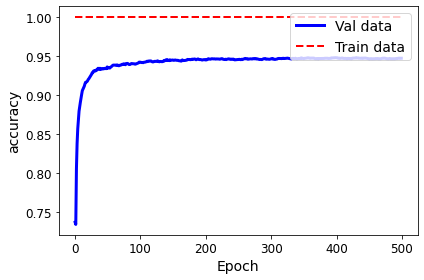

In [95]:
plt.plot(val_accuracy, "b-", linewidth=3, label="Val data")
plt.plot(train_accuracy, "r--", linewidth=2, label="Train data")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("accuracy", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

best_val_accuracy = max(val_accuracy)
best_epoch = np.argmax(val_accuracy)+1


In [46]:
best_model

ExtraTreesClassifier(n_estimators=500, random_state=42)

In [39]:
st=time.time()
best_model=ExtraTreesClassifier(n_estimators=500, random_state=42)
best_model.fit(X_train_scaled, y_train)
ed=time.time()
best_train_time=ed-st

st=time.time()
best_test_score=best_model.score(X_test_scaled,y_test)
ed=time.time()
inference_time = ed-st
print("score :",best_test_score,", train time =",best_train_time,"seconds, inference time =",inference_time,"seconds",best_model)

score : 0.9423456790123457 , train time = 295.2800512313843 seconds, inference time = 2.629145383834839 seconds ExtraTreesClassifier(n_estimators=500, random_state=42)


n_estimators=500은 시간이 너무 오래 걸리므로 덜 걸리는 파라미터를 선정 --> n_estimators=220

In [40]:
st=time.time()
best_model=ExtraTreesClassifier(n_estimators=220, random_state=42)
best_model.fit(X_train_scaled, y_train)
ed=time.time()
best_train_time=ed-st

st=time.time()
best_test_score=best_model.score(X_test_scaled,y_test)
ed=time.time()
inference_time = ed-st
print("score :",best_test_score,", train time =",best_train_time,"seconds, inference time =",inference_time,"seconds",best_model)

score : 0.9417283950617283 , train time = 133.10065507888794 seconds, inference time = 1.0128686428070068 seconds ExtraTreesClassifier(n_estimators=220, random_state=42)
